# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Experiments of Chapter 4


<center>
<table><tr>
  
  <td> <a href="http://ufmg.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ufmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
</tr>
</table>
</center>


* **Author**: Petrônio Cândido de  Lima e Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SILVA, P.C.L)
* **Advisor**: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (GUIMARÃES, F. G)
* **Co-Advisor**: Hossein Javedani Sadaei  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-0848-9280" href="https://orcid.org/0000-0002-0848-9280" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SADAEI, H. J.)

This notebook is part of [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3374641.svg)](https://doi.org/10.5281/zenodo.3374641). You can execute it on-line with the Google Colab tool at http://bit.ly/scalable_probabilistic_fts_chap4

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr>
  
  <td>Powered by </td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>



## Library Installation

In [1]:
# Requirements: Python 3.6
# The command below install the exact version of pyFTS library employed in the experiments
!pip3 install -U git+git://github.com/PYFTS/pyFTS.git@0b03fbfa57ff361248a5eb4e69e5e1b2d3fb4e48 
!pip install pyflux
!git clone https://github.com/petroniocandido/stac

  Cloning git://github.com/PYFTS/pyFTS.git (to revision 0b03fbfa57ff361248a5eb4e69e5e1b2d3fb4e48) to /tmp/pip-req-build-gxbw5tz6
  Running command git clone -q git://github.com/PYFTS/pyFTS.git /tmp/pip-req-build-gxbw5tz6
  Running command git checkout -q 0b03fbfa57ff361248a5eb4e69e5e1b2d3fb4e48
  Created wheel for pyFTS: filename=pyFTS-1.6-cp36-none-any.whl size=192006 sha256=e22e7c07efb13549243d36f596fa34dae7083f6ea4ab9dd9d54aae41076e0ed5
  Stored in directory: /tmp/pip-ephem-wheel-cache-zboic4ek/wheels/23/58/20/caad547064ed831a65331f9b3f8242954e489a6272d633bca6
Successfully built pyFTS
     |████████████████████████████████| 1.3MB 2.9MB/s 
     |████████████████████████████████| 962kB 49.6MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656697 sha256=d5ac03cc8d987289ed0cd4eb8076bd2906209eff19bbb4f4d2150feaea91c800
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyfl

## Common Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
from pyFTS.models.ensemble import ensemble
from pyFTS.models import hofts
from pyFTS.benchmarks import benchmarks, Util as bUtil, arima, quantreg, BSTS, knn
from pyFTS.common import Util

## Experiments database import

The execution of the experiments is a computationally expensive and  time consuming task. In case you don't want to repeat the whole batch of experiments, just download the experiment database.


In [0]:
!wget -O experiments.db.gz https://github.com/petroniocandido/PhdThesis/raw/master/experiments/experiments.db.gz
!gunzip experiments.db.gz

--2019-06-13 13:22:25--  https://www.dropbox.com/s/z45fq0bqdrtptu1/experiments.db.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/z45fq0bqdrtptu1/experiments.db.gz [following]
--2019-06-13 13:22:25--  https://www.dropbox.com/s/dl/z45fq0bqdrtptu1/experiments.db.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8888fc09bb0185389c1bcec45d.dl.dropboxusercontent.com/cd/0/get/AisyX6T2DV6rJHeBLMcr4hgRdJspJBYZ7NiYuraPyfsdARER6Tx9PeAZLSOm0HnhzQCODkcexzOpma4xfTGwh646wAdtIeChLNAtL7knbFNvBA/file?dl=1# [following]
--2019-06-13 13:22:25--  https://uc8888fc09bb0185389c1bcec45d.dl.dropboxusercontent.com/cd/0/get/AisyX6T2DV6rJHeBLMcr4hgRdJspJBYZ7NiYuraPyfsdARER6Tx9PeAZLSOm0HnhzQCODkcexzOpma4xfTGwh646wAdtIeChLNAtL7knbFNvBA/file?dl

## Datasets

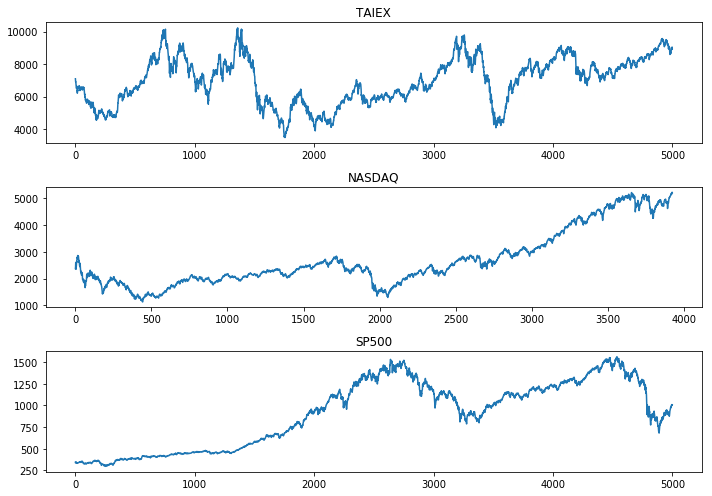

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

datasets = {}

datasets['TAIEX'] = TAIEX.get_data()[:5000]
datasets['NASDAQ'] = NASDAQ.get_data()[:5000]
datasets['SP500'] = SP500.get_data()[10000:15000]

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[10,7])

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
  ax[ct].plot(dataset)
  ax[ct].set_title(dataset_name)

plt.tight_layout()


## PWFTS Grid Search

### Point Analysis

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[pwfts.ProbabilisticWeightedFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 80, 5),
                                    progress=False, type='point',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


In [0]:
from pyFTS.benchmarks import Util as bUtil

rmse = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='PWFTS' and measure = 'rmse'")

rmse['Partitions'] = [int.from_bytes(k, "little") for k in rmse['Partitions'].values]

rmse.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,279427,2019-06-12 18:22:16,TAIEX,gridsearch,point,PWFTS,,1,Grid,10,10,1,None,rmse,167.70
1,279430,2019-06-12 18:22:16,TAIEX,gridsearch,point,PWFTS,,1,Grid,15,14,1,None,rmse,136.27
2,279433,2019-06-12 18:22:16,TAIEX,gridsearch,point,PWFTS,,1,Grid,20,18,1,None,rmse,127.81
3,279436,2019-06-12 18:22:18,TAIEX,gridsearch,point,PWFTS,,1,Grid,25,22,1,None,rmse,112.78
4,279439,2019-06-12 18:22:18,TAIEX,gridsearch,point,PWFTS,,1,Grid,30,26,1,None,rmse,110.90


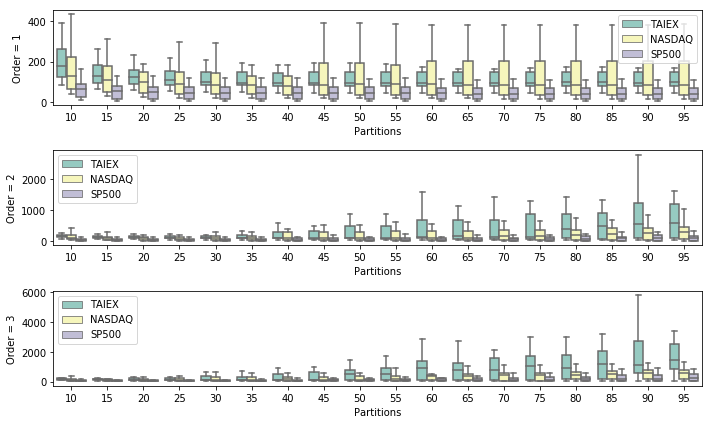

In [0]:
import seaborn as sns

orders = rmse['Order'].unique()

fig, ax = plt.subplots(nrows=len(orders), ncols=1, figsize=[10,2*len(orders)])

for co, order in enumerate(orders):
  
    df = rmse[(rmse['Order']==order)]

    g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax[co], 
                     palette="Set3")
    g1.legend(handles=None)
    ax[co].set_ylabel("Order = {}".format(order))
    ax[co].set_xlabel("Partitions")

    #box = g1.get_position()
    #g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    #g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)

    plt.tight_layout()

### Interval Analysis

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[pwfts.ProbabilisticWeightedFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 80, 5),
                                    progress=False, type='point',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


#### Plots

In [0]:
from pyFTS.benchmarks import Util as bUtil

wk05 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='PWFTS' and measure = 'winkler05'")
wk25 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='PWFTS' and measure = 'winkler25'")

wk05['Partitions'] = [int.from_bytes(k, "little") for k in wk05['Partitions'].values]
wk25['Partitions'] = [int.from_bytes(k, "little") for k in wk25['Partitions'].values]

wk05.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,191855,2019-06-07 16:44:33,TAIEX,gridsearch,interval,PWFTS,,1,Grid,10,10,1,None,winkler05,1416.71
1,191865,2019-06-07 16:44:33,TAIEX,gridsearch,interval,PWFTS,,1,Grid,15,14,1,None,winkler05,953.47
2,191875,2019-06-07 16:44:33,TAIEX,gridsearch,interval,PWFTS,,1,Grid,20,18,1,None,winkler05,747.12
3,191885,2019-06-07 16:44:33,TAIEX,gridsearch,interval,PWFTS,,1,Grid,25,22,1,None,winkler05,625.50
4,191895,2019-06-07 16:44:33,TAIEX,gridsearch,interval,PWFTS,,1,Grid,30,26,1,None,winkler05,557.82


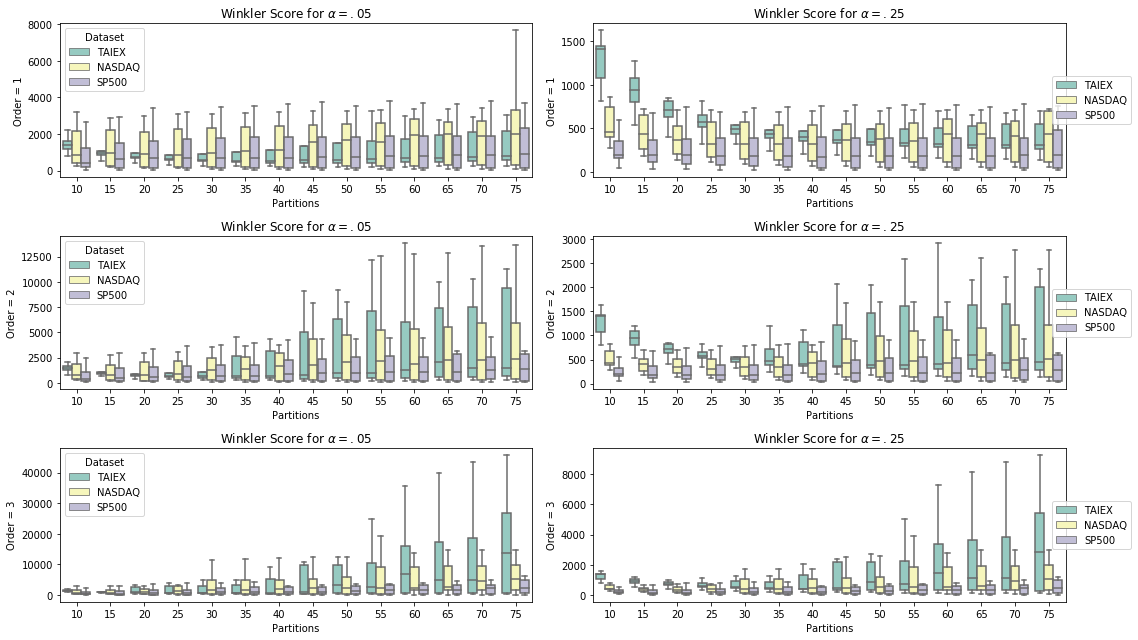

In [0]:
import seaborn as sns

orders = wk05['Order'].unique()

fig, ax = plt.subplots(nrows=len(orders), ncols=2, figsize=[15,3*len(orders)])

for co, order in enumerate(orders):
  
  df = wk05[(wk05['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][0], 
                   palette="Set3")
  ax[co][0].set_title("Winkler Score for $\\alpha=.05$")
  ax[co][0].set_ylabel("Order = {}".format(order))
  ax[co][0].set_xlabel("Partitions")
  
  df = wk25[(wk25['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][1], 
                   palette="Set3")
  box = g1.get_position()
  g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
  g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
  ax[co][1].set_title("Winkler Score for $\\alpha=.25$")
  ax[co][1].set_ylabel("Order = {}".format(order))
  ax[co][1].set_xlabel("Partitions")

plt.tight_layout()

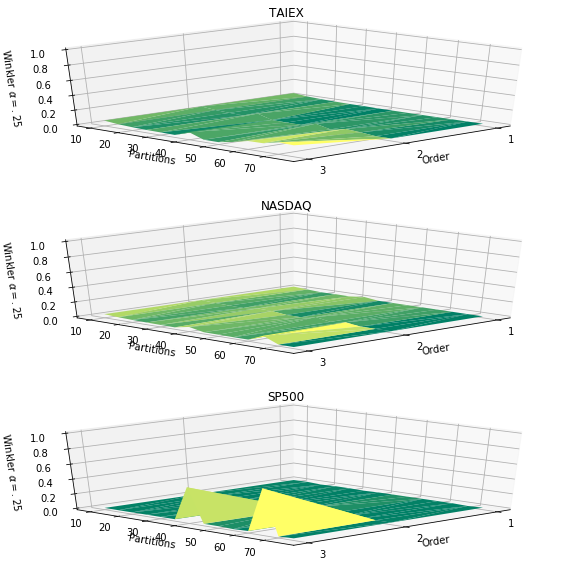

In [0]:
from sklearn import preprocessing

fig = plt.figure(figsize=[10,10])

nplots = len(datasets.keys())

for ct, dataset in enumerate(datasets.keys()):

  df = bUtil.get_dataframe_from_bd("experiments.db","tag = 'gridsearch' " 
                                    +" and dataset = '{}' and Model='PWFTS' and measure = 'winkler25'".format(dataset))

  df['Partitions'] = [int.from_bytes(k, "little") for k in df['Partitions'].values]
  
  min_max_scaler = preprocessing.MinMaxScaler()

  df['Value'] = min_max_scaler.fit_transform([[k] for k in df['Value'].values]).flatten()


  ax = fig.add_subplot(nplots, 1, ct+1, projection='3d')
  ax.plot_trisurf(df['Order'].values, df['Partitions'].values, df['Value'].values, cmap="summer", linewidth=0.2, antialiased=True)
  ax.view_init(30,45)
  ax.set_title(dataset) #"Error surface by order and number of partitions")
  ax.set_xlabel("Order")
  ax.set_xticks([1,2,3])
  ax.set_ylabel("Partitions")
  ax.set_zlabel("Winkler $\\alpha=.25$")
#ax.set_zlim([0,1])
#plt.tight_layout()
plt.show()


### Probabilistic Analysis

#### Batch Experiment Execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[pwfts.ProbabilisticWeightedFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 80, 5),
                                    progress=False, type='distribution',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


#### Plots

In [0]:
from pyFTS.benchmarks import Util as bUtil

crps = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model like 'PWFTS' and measure = 'crps'")

crps['Partitions'] = [int.from_bytes(k, "little") for k in crps['Partitions'].values]

crps.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,216207,2019-06-07 17:14:23,TAIEX,gridsearch,density,PWFTS,,1,Grid,10,10,1,None,crps,1.999
1,216210,2019-06-07 17:14:25,TAIEX,gridsearch,density,PWFTS,,1,Grid,15,14,1,None,crps,1.492
2,216213,2019-06-07 17:14:25,TAIEX,gridsearch,density,PWFTS,,1,Grid,20,18,1,None,crps,1.206
3,216216,2019-06-07 17:14:34,TAIEX,gridsearch,density,PWFTS,,1,Grid,25,22,1,None,crps,1.056
4,216219,2019-06-07 17:14:34,TAIEX,gridsearch,density,PWFTS,,1,Grid,30,26,1,None,crps,0.978


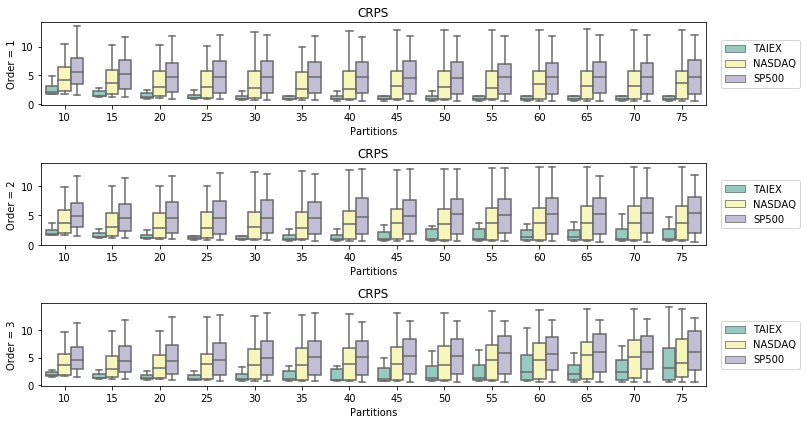

In [0]:
fig, ax = plt.subplots(nrows=len(orders), ncols=1, figsize=[10,2*len(orders)])

for co, order in enumerate(orders):
  
  df = crps[(crps['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co], 
                   palette="Set3")
  box = g1.get_position()
  g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
  g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
  ax[co].set_title("CRPS")
  ax[co].set_ylabel("Order = {}".format(order))
  ax[co].set_xlabel("Partitions")

plt.tight_layout()

## Experiments

### Point

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
competitor_methods = []
competitor_methods.extend([arima.ARIMA]*3)
competitor_methods.extend([quantreg.QuantileRegression]*2)
competitor_methods.extend([BSTS.ARIMA]*3)
competitor_methods.extend([knn.KNearestNeighbors]*2)

competitor_methods_parameters = [
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1, 'alpha': .5},
    {'order': 2, 'alpha': .5},
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1},
    {'order': 2}
]

proposed_methods = [
    hofts.HighOrderFTS, hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS
]
proposed_methods_parameters=[
    {},{},{}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=competitor_methods,
                                     benchmark_methods_parameters=competitor_methods_parameters,
                                     methods=proposed_methods,
                                     methods_parameters=proposed_methods_parameters,
                                    orders=[1],
                                    partitions=[35],
                                    steps_ahead=[10],
                                    progress=False, type='point',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="experiments")

#### Result Table

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "rmse", 'Steps = 0 and Value < 5000')
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.5':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

,dataset,ARIMA,QAR,PWFTS,WHOFTS,HOFTS,kNN,BSTS
0,SP500,6.091,8.177,10.541,12.822,13.605,19.242,380.466
1,NASDAQ,22.592,17.951,24.839,27.154,29.713,34.742,413.494
2,TAIEX,91.311,66.900,75.558,90.433,100.787,80.213,271.660


#### Mean Equality Test

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests, alpha=.05)
print(ranks.to_latex())
#ranks

F-Value: 13.903114186851207 	p-Value: 0.030737356514312197

H0 is rejected!

\begin{tabular}{llr}
\toprule
{} &  METHOD &       RANK \\
\midrule
1 &     QAR &   6.333333 \\
0 &   ARIMA &   7.333333 \\
2 &   PWFTS &   8.333333 \\
3 &  WHOFTS &  10.333333 \\
4 &   HOFTS &  12.000000 \\
5 &     kNN &  12.666667 \\
6 &    BSTS &  20.000000 \\
\bottomrule
\end{tabular}



#### Post Hoc Test

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'PWFTS', alpha=.05)

print(tests.to_latex())
#tests

\begin{tabular}{llrrrl}
\toprule
{} &       COMPARISON &   Z-VALUE &   P-VALUE &  ADJUSTED P-VALUE &       Result \\
\midrule
0 &    PWFTS vs BSTS &  2.302831 &  0.021288 &          0.121122 &  H0 Accepted \\
1 &     PWFTS vs kNN &  0.855337 &  0.392364 &          0.775648 &  H0 Accepted \\
2 &   PWFTS vs HOFTS &  0.723747 &  0.469221 &          0.775648 &  H0 Accepted \\
3 &     PWFTS vs QAR &  0.394771 &  0.693012 &          0.829909 &  H0 Accepted \\
4 &  PWFTS vs WHOFTS &  0.394771 &  0.693012 &          0.829909 &  H0 Accepted \\
5 &   PWFTS vs ARIMA &  0.197386 &  0.843526 &          0.843526 &  H0 Accepted \\
\bottomrule
\end{tabular}



#### Many steps ahead accuracy

In [0]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
"  measure = 'rmse' and Value < 5000"

rmse = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='05'))

rmse.head()

,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,249267,2019-06-10 20:04:21,TAIEX,experiments,point,"ARIMA(1,0,0)-0.05",,NaN,,NaN,0,0,None,rmse,62.722894
1,249275,2019-06-10 20:04:21,TAIEX,experiments,point,"ARIMA(1,0,0)-0.05",,NaN,,NaN,0,2,None,rmse,27.508431
2,249283,2019-06-10 20:04:21,TAIEX,experiments,point,"ARIMA(1,0,0)-0.05",,NaN,,NaN,0,4,None,rmse,45.017926
3,249291,2019-06-10 20:04:21,TAIEX,experiments,point,"ARIMA(1,0,0)-0.05",,NaN,,NaN,0,6,None,rmse,180.206213
4,249307,2019-06-10 20:04:21,TAIEX,experiments,point,"ARIMA(1,0,1)-0.05",,NaN,,NaN,0,0,None,rmse,213.200529


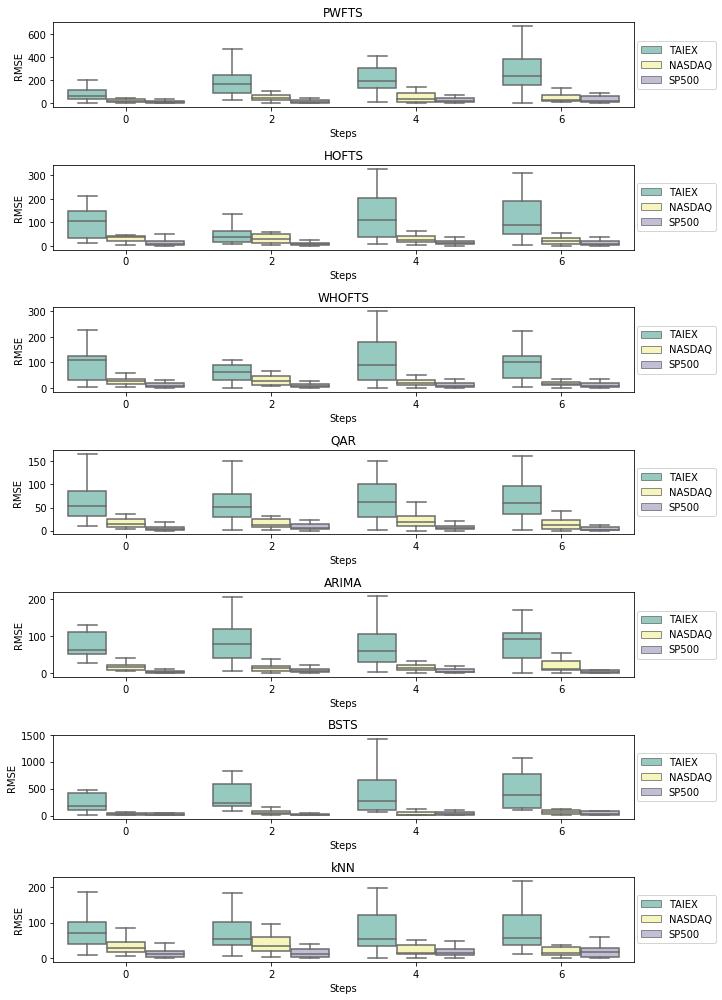

In [0]:

datasets = rmse['Dataset'].unique()

models = ['PWFTS', 'HOFTS', 'WHOFTS',
          'QAR(1)-0.5', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['PWFTS', 'HOFTS', 'WHOFTS', 'QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])

for cm, model in enumerate(models):
    df = rmse[(rmse['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax[cm], 
                 palette="Set3")
    ax[cm].set_ylabel("RMSE")
    ax[cm].set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

#### Residual Analysis

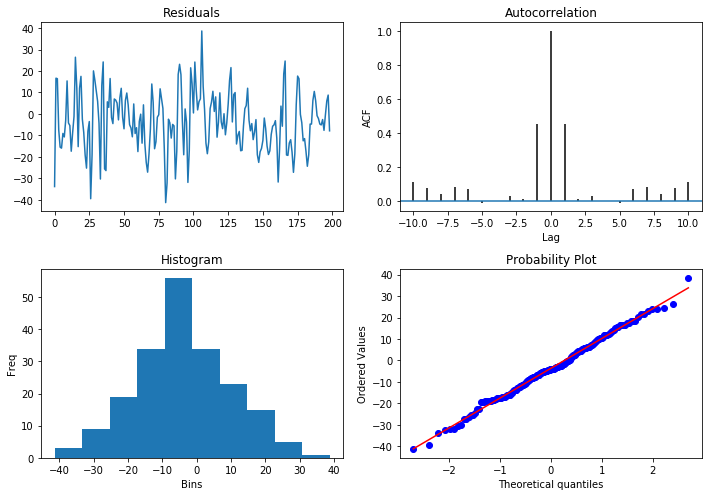

In [0]:
from pyFTS.models import pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import ResidualAnalysis

train = datasets['SP500'][2000:2800]
test = datasets['SP500'][2800:3000]

fs = Grid.GridPartitioner(data=train, npart=55)
    
model = pwfts.ProbabilisticWeightedFTS(partitioner=fs, order=1)
model.fit(train)
forecasts = model.predict(test)
res = ResidualAnalysis.residuals(test, forecasts, order=model.order)

ResidualAnalysis.single_plot_residuals(res,order=1)



In [0]:
ljung_box_test = ResidualAnalysis.ljung_box_test(res,alpha=0.05)

print(ljung_box_test.to_latex())
#ljung_box_test

\begin{tabular}{lrrrrl}
\toprule
{} &  Lag &  Statistic &       p-Value &  Critical Value &       Result \\
\midrule
0 &    1 &  34.846143 &  3.568157e-09 &        3.841459 &  H0 accepted \\
1 &    2 &  35.497255 &  1.958254e-08 &        5.991465 &  H0 accepted \\
2 &    3 &  35.871542 &  7.971605e-08 &        7.814728 &  H0 accepted \\
\bottomrule
\end{tabular}



In [0]:
from pyFTS.common import Util as cUtil
from pyFTS.models import pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import ResidualAnalysis


res = {}

for dataset_name, dataset in datasets.items():
  res[dataset_name] = []
  
  for ct, train, test in cUtil.sliding_window(dataset, 1000, .9, inc=.5):
    
    fs = Grid.GridPartitioner(data=train, npart=35)
    
    model = pwfts.ProbabilisticWeightedFTS(partitioner=fs, order=1)
    model.fit(train)
    forecasts = model.predict(test)
    res[dataset_name].extend(
        ResidualAnalysis.residuals(test, forecasts, order=model.order)
    )

    

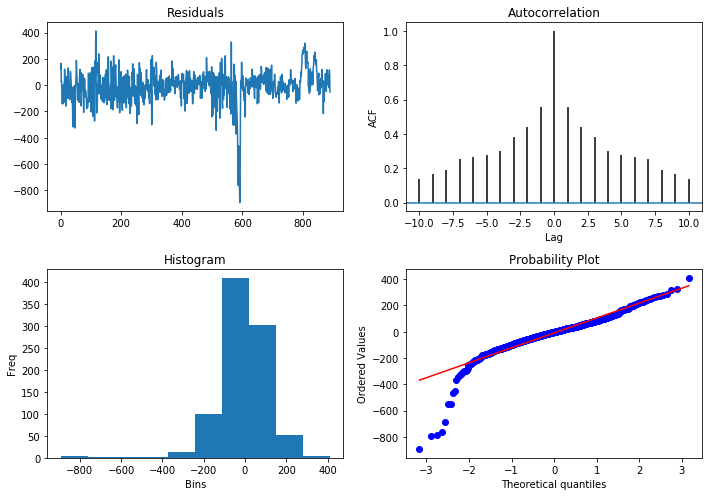

In [0]:
from pyFTS.benchmarks import ResidualAnalysis

ResidualAnalysis.single_plot_residuals(res['TAIEX'],order=1)

In [0]:
from pyFTS.benchmarks import ResidualAnalysis

ljung_box_test = ResidualAnalysis.ljung_box_test(res['TAIEX'],alpha=0.05)
ljung_box_test
#print(ljung_box_test.to_latex())

,Lag,Statistic,p-Value,Critical Value,Result
0,1,274.036234,0.0,3.841459,H0 accepted
1,2,447.164960,0.0,5.991465,H0 accepted
2,3,575.500305,0.0,7.814728,H0 accepted


### Interval

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
from pyFTS.benchmarks import arima, quantreg, BSTS, knn
from pyFTS.models import ifts, hofts
from pyFTS.ensemble import ensemble

competitor_methods = []
competitor_methods.extend([arima.ARIMA]*6)
competitor_methods.extend([quantreg.QuantileRegression]*4)
competitor_methods.extend([BSTS.ARIMA]*6)
competitor_methods.extend([knn.KNearestNeighbors]*4)


competitor_methods_parameters = [
    {'order':(1,0,0), 'alpha':.05},
    {'order':(1,0,0), 'alpha':.25},
    {'order':(1,0,1), 'alpha':.05},
    {'order':(1,0,1), 'alpha':.25},
    {'order':(2,0,0), 'alpha':.05},
    {'order':(2,0,0), 'alpha':.25},
    {'order':1, 'alpha':.05},
    {'order':1, 'alpha':.25},
    {'order':2, 'alpha':.05},
    {'order':2, 'alpha':.25},
    {'order': (1, 0, 0), 'alpha': .05},
    {'order': (1, 0, 0), 'alpha': .25},
    {'order': (1, 0, 1), 'alpha': .05},
    {'order': (1, 0, 1), 'alpha': .25},
    {'order': (2, 0, 0), 'alpha': .05},
    {'order': (2, 0, 0), 'alpha': .25},
    {'order': 1, 'alpha': .05},
    {'order': 1, 'alpha': .25}
    {'order': 2, 'alpha': .05},
    {'order': 2, 'alpha': .25}
]

proposed_methods = [
    pwfts.ProbabilisticWeightedFTS,
    ifts.IntervalFTS, ifts.WeightedIntervalFTS, 
    ensemble.SimpleEnsembleFTS, ensemble.SimpleEnsembleFTS
]

proposed_methods_parameters=[
    {}, {},{},
    {'name': 'EnsembleFTS', 'alpha':.05, 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)},
    {'name': 'EnsembleFTS', 'alpha':.25, 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=competitor_methods,
                                     benchmark_methods_parameters=competitor_methods_parameters,
                                     methods=proposed_methods,
                                     methods_parameters=proposed_methods_parameters,
                                     transformations=[None],
                                     orders=[1],
                                     steps_ahead=[10],
                                     partitions=[45],
                                     type='interval',
                                     distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                     file="experiments.db", dataset=dataset_name, tag="experiments")

#### Result Table

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "winkler05", 'Steps = 0 and Value < 5000')
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.05':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

,dataset,ARIMA,PWFTS,QAR,WIFTS,IFTS,kNN,EnsembleFTS,BSTS
0,SP500,72.712,73.505,121.694,111.705,113.516,131.394,268.567,292.415
1,NASDAQ,233.261,112.944,106.416,123.350,284.692,170.709,603.881,652.036
2,TAIEX,858.124,348.647,340.000,480.581,917.879,428.484,898.531,1280.675


#### Mean Equality Test

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests)
#print(ranks.to_latex())
ranks

F-Value: 14.812664907651715 	p-Value: 0.038477163168637474

H0 is rejected!



,METHOD,RANK
1,PWFTS,6.000000
2,QAR,6.666667
3,WIFTS,7.666667
5,kNN,8.666667
0,ARIMA,13.000000
4,IFTS,16.666667
6,EnsembleFTS,19.666667
7,BSTS,21.666667


#### Post-Hoc Tests

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'PWFTS')

#print(tests.to_latex())
tests

,COMPARISON,Z-VALUE,P-VALUE,ADJUSTED P-VALUE,Result
0,PWFTS vs BSTS,2.713546,0.006657,0.045677,H0 Rejected
1,PWFTS vs EnsembleFTS,2.367136,0.017926,0.061349,H0 Accepted
2,PWFTS vs IFTS,1.847521,0.064672,0.144442,H0 Accepted
3,PWFTS vs ARIMA,1.212436,0.225346,0.360355,H0 Accepted
4,PWFTS vs kNN,0.461880,0.644167,0.764634,H0 Accepted
5,PWFTS vs WIFTS,0.288675,0.772830,0.822550,H0 Accepted
6,PWFTS vs QAR,0.115470,0.908073,0.908073,H0 Accepted


#### Many Steps Ahead Accuracy

In [0]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
" (Model like '%{a}' or Model in ('PWFTS')) and measure = 'winkler{a}' and Value < 5000"

wk05 = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='05'))
wk25 = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='25'))

wk05.head()

,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,54082,2019-06-04 13:51:43,TAIEX,experiments,interval,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,2,None,winkler05,509.39
1,54100,2019-06-04 13:51:43,TAIEX,experiments,interval,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,4,None,winkler05,764.08
2,54118,2019-06-04 13:51:43,TAIEX,experiments,interval,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,6,None,winkler05,1018.78
3,54280,2019-06-04 13:51:43,TAIEX,experiments,interval,QAR(2)-0.05,,NaN,,NaN,0,4,None,winkler05,905.93
4,54298,2019-06-04 13:51:43,TAIEX,experiments,interval,QAR(2)-0.05,,NaN,,NaN,0,6,None,winkler05,1182.79


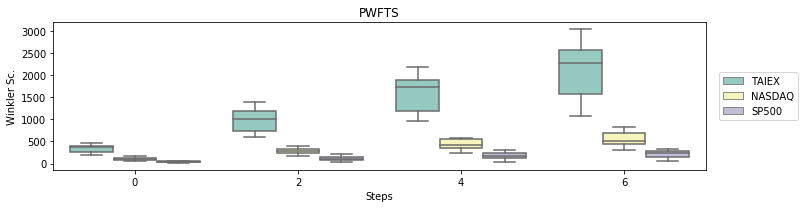

In [0]:

datasets = wk05['Dataset'].unique()
#models = wk05['Model'].unique()

models = ['PWFTS','EnsembleFTS-.05',
          'QAR(1)-0.05', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['PWFTS','EnsembleFTS','QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
#fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])


#for cm, model in enumerate(models):
for cm, model in enumerate(['PWFTS']):
  #for cd, dataset in enumerate(datasets):
    df = wk05[(wk05['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax, 
                 palette="Set3")
    ax.set_ylabel("Winkler Sc.")
    ax.set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

### Probabilistic

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [0]:
competitor_methods = []
competitor_methods.extend([arima.ARIMA]*3)
competitor_methods.extend([quantreg.QuantileRegression]*2)
competitor_methods.extend([BSTS.ARIMA]*3)
competitor_methods.extend([knn.KNearestNeighbors]*2)

competitor_methods_parameters = [
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1, 'dist': True},
    {'order': 2, 'dist': True},
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1},
    {'order': 2}
]

proposed_methods = [
    hofts.HighOrderFTS, hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS,
    ensemble.SimpleEnsembleFTS
]
proposed_methods_parameters=[
    {},{},{},
    {'name': 'EnsembleFTS', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=competitor_methods,
                                     benchmark_methods_parameters=competitor_methods_parameters,
                                     methods=proposed_methods,
                                     methods_parameters=proposed_methods_parameters,
                                    orders=[1],
                                    partitions=[35],
                                    steps_ahead=[10],
                                    progress=False, type='distribution',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="experiments")

#### Result Table

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "crps", "Steps = 0 and Value < 5000")
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.05':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

tests
#print(tests.to_latex())

,dataset,PWFTS,QAR,kNN,ARIMA,EnsembleFTS,BSTS
0,NASDAQ,0.882,1.028,1.158,1.444,1.923,3.208
1,TAIEX,0.967,1.135,1.229,1.691,1.301,4.081
2,SP500,1.257,1.557,4.403,1.216,1.995,3.278


#### Mean Equality Test

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests)
#print(ranks.to_latex())
ranks

F-Value: 10.352711804324706 	p-Value: 0.06583635032195168

H0 is accepted!



,METHOD,RANK
0,PWFTS,3.333333
1,QAR,5.666667
3,ARIMA,8.666667
2,kNN,11.333333
4,EnsembleFTS,11.666667
5,BSTS,16.333333


#### Post Hoc Tests

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'PWFTS')

#print(tests.to_latex())
tests

,COMPARISON,Z-VALUE,P-VALUE,ADJUSTED P-VALUE,Result
0,PWFTS vs BSTS,2.982405,0.002860,0.014218,H0 Rejected
1,PWFTS vs EnsembleFTS,1.911798,0.055902,0.133951,H0 Accepted
2,PWFTS vs kNN,1.835326,0.066457,0.133951,H0 Accepted
3,PWFTS vs ARIMA,1.223551,0.221122,0.268293,H0 Accepted
4,PWFTS vs QAR,0.535303,0.592440,0.592440,H0 Accepted


#### Many Steps Ahead Accuracy

In [0]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
" measure = 'crps' and Value < 5000"

crps = bUtil.get_dataframe_from_bd("experiments.db", sql)

crps.head()

,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,95637,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,0,None,crps,4.224
1,95643,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,2,None,crps,1.237
2,95649,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,4,None,crps,0.806
3,95655,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,6,None,crps,1.648
4,95667,2019-06-04 17:09:44,TAIEX,experiments,density,QAR(2)-0.05,,NaN,,NaN,0,0,None,crps,4.623


In [0]:
crps['Model'].unique()

array(['ARIMA(2,0,0)-0.05', 'QAR(2)-0.05', 'BSTS(2,0,0)-0.05',
       'kNN(2)-0.05', 'EnsembleFTS', 'ARIMA(1,0,0)-0.05',
       'ARIMA(1,0,1)-0.05', 'QAR(1)-0.05', 'BSTS(1,0,0)-0.05',
       'BSTS(1,0,1)-0.05', 'kNN(1)-0.05'], dtype=object)

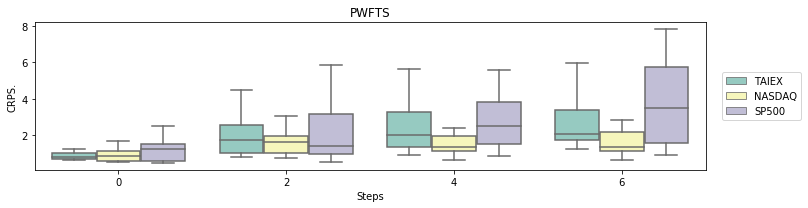

In [0]:

datasets = crps['Dataset'].unique()

models = ['PWFTS', 'EnsembleFTS',
          'QAR(1)-0.05', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['PWFTS','EnsembleFTS','QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
#fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])


#for cm, model in enumerate(models):
for cm, model in enumerate(['PWFTS']):
  #for cd, dataset in enumerate(datasets):
    df = crps[(crps['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax, 
                 palette="Set3")
    ax.set_ylabel("CRPS.")
    ax.set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

## Samples

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500
from pyFTS.common import Util

train = TAIEX.get_data()[1000:1800]
test = TAIEX.get_data()[1800:2000]


### One Step Ahead

In [0]:
from pyFTS.models import pwfts
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=train, npart=45)

model = pwfts.ProbabilisticWeightedFTS(partitioner=fs, order=1)
model.fit(train)

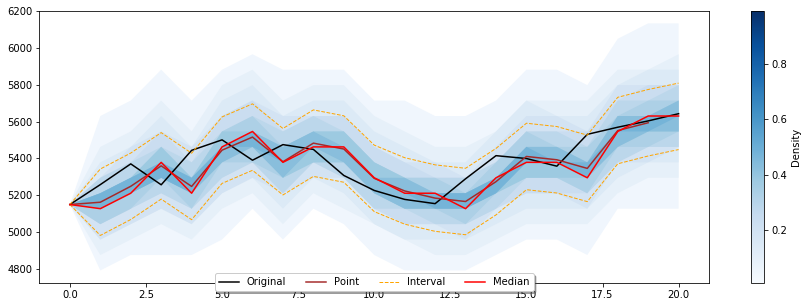

In [0]:
forecasts = model.predict(test[:20], type='point')
intervals = model.predict(test[:20], type='interval')
distributions = model.predict(test[:20], type='distribution')

forecasts.insert(0,test[0])
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:21], label='Original',color='black')
ax.plot(forecasts[:-1], label='Point',color='brown')
Util.plot_interval2(intervals, test[:10], start_at=model.order-1, ax=ax, color='orange', ls='--', label='Interval')
Util.plot_distribution2(distributions, test[:10], start_at=model.order-1, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

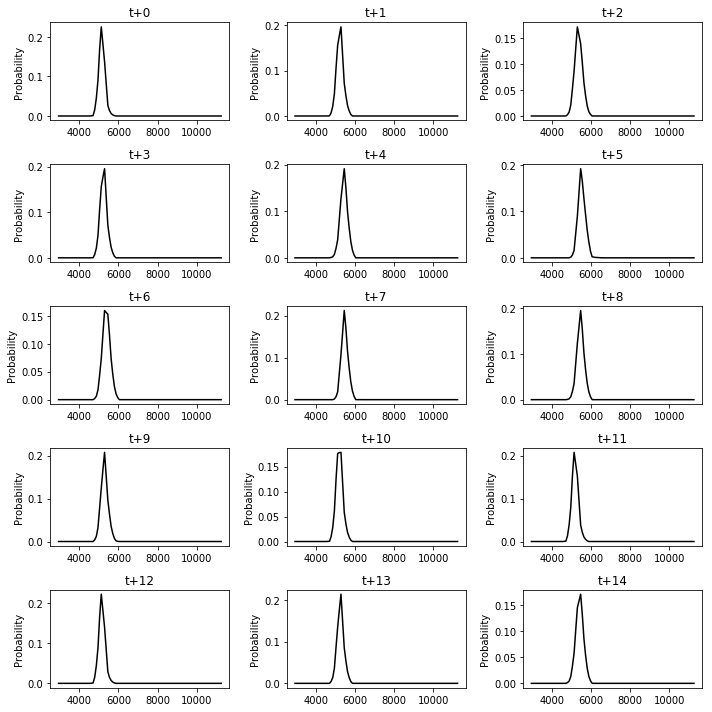

In [0]:
Util.plot_distribution_tiled(distributions,rows=5,cols=3,size=[10,10])

### Many Steps Ahead 

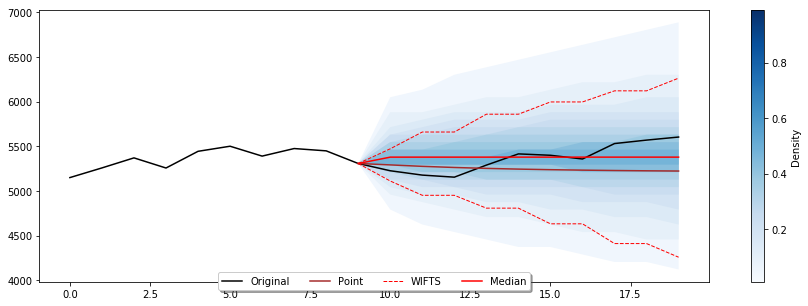

In [0]:
horizon=10

forecasts = model.predict(test[9:20], type='point', steps_ahead=horizon)
intervals = model.predict(test[9:20], type='interval', steps_ahead=horizon)
distributions = model.predict(test[9:20], type='distribution', steps_ahead=horizon)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:20], label='Original',color='black')
for k in range(9):
  forecasts.insert(0,None)
forecasts.insert(9,test[9])
ax.plot(forecasts, label='Point',color='brown')
Util.plot_interval2(intervals, test[:20], start_at=9, ax=ax, color='red', ls='--', label='WIFTS')
Util.plot_distribution2(distributions, test[:20], start_at=9, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))


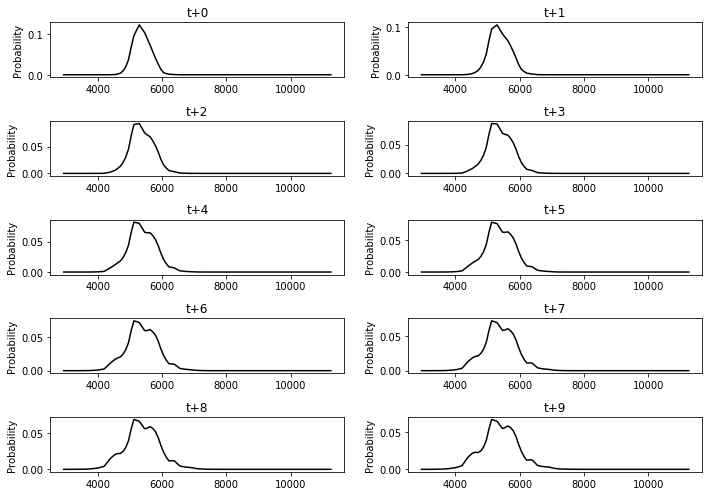

In [0]:
Util.plot_distribution_tiled(distributions,rows=5,cols=2,size=[10,7])